In [2]:
##import needed modules
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
%pylab inline
# import the file
df = pd.read_csv('~/Desktop/Churn_Modelling.csv',error_bad_lines=False)

len(df)


Populating the interactive namespace from numpy and matplotlib


10000

In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#make a copy for our KNN analysis 
df2=df.copy()
df2= df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1) 
df2['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
#create design matrices
Y, X = dmatrices('Exited ~ 0 + CreditScore + Geography + Gender + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary', df2, return_type="dataframe")
print('Design matrix X')
print(X[:5])
print('Outcomes Y')
print(Y[:5])

Design matrix X
   Geography[France]  Geography[Germany]  Geography[Spain]  Gender[T.Male]  \
0                1.0                 0.0               0.0             0.0   
1                0.0                 0.0               1.0             0.0   
2                1.0                 0.0               0.0             0.0   
3                1.0                 0.0               0.0             0.0   
4                0.0                 0.0               1.0             0.0   

   CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0        619.0  42.0     2.0       0.00            1.0        1.0   
1        608.0  41.0     1.0   83807.86            1.0        0.0   
2        502.0  42.0     8.0  159660.80            3.0        1.0   
3        699.0  39.0     1.0       0.00            2.0        0.0   
4        850.0  43.0     2.0  125510.82            1.0        1.0   

   IsActiveMember  EstimatedSalary  
0             1.0        101348.88  
1             1.0        1

In [10]:
y = Y['Exited'].values
print(y[:5])

[1. 0. 1. 0. 0.]


# Random Sample KNN

In [11]:
#split up data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape)


y_train[0:5]

Number transactions X_train dataset:  (7000, 12)
Number transactions y_train dataset:  (7000,)
Number transactions X_test dataset:  (3000, 12)
Number transactions y_test dataset:  (3000,)


array([0., 0., 1., 0., 0.])

In [12]:
#set up the classifier
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=20,
                                       weights='uniform',
                                       p=2)

#fit the classifier
model.fit(X_train, y_train)

#see how well the classifier predicts
print('Predictions =', model.predict(X_train.iloc[0:5]))

Predictions = [0. 0. 0. 0. 0.]


In [13]:
#run on training data
from sklearn import metrics
prediction_on_training = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_on_training))

0.7992857142857143


Classifier is only 79.9% accurate on training data. --> Why is it so low? 

In [14]:
model.predict_proba(X_train.iloc[0:5])

array([[0.95, 0.05],
       [0.9 , 0.1 ],
       [0.75, 0.25],
       [0.9 , 0.1 ],
       [0.85, 0.15]])

This shows the probabilties of the 2 classes. 

In [15]:
model.predict(X_train.iloc[0:5])

array([0., 0., 0., 0., 0.])

In [16]:
predicted_classes = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes))

0.7903333333333333


Now test accuracy is lower. 

In [17]:
#Varying model paramters
from sklearn import model_selection

kfold = model_selection.StratifiedKFold(n_splits=3).split(X=X[:6], y=[0,0,0,1,1,1])
for train, holdout in kfold:
    print('train indices =', train, 'holdout indices =', holdout)

train indices = [1 2 4 5] holdout indices = [0 3]
train indices = [0 2 3 5] holdout indices = [1 4]
train indices = [0 1 3 4] holdout indices = [2 5]


In [18]:
def cv_accuracy_score(X, y, nn):
    """For each fold, fit the nearest neighbors model
    with nn nearest neighbors on the train, and return accuracy
    on the test."""
    
    model = neighbors.KNeighborsClassifier(n_neighbors=nn,
                                           weights='uniform')
    accuracies = []
    
    kfold = model_selection.StratifiedKFold(n_splits=3, shuffle=True).split(X, y)
    for train, holdout in kfold:
        # Select the training and testing data using the indices
        # provided by kfold
        X_train = X.iloc[train]
        X_holdout = X.iloc[holdout]
        y_train = y[train]
        y_holdout = y[holdout]
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Compute test accuracy
        accuracy = metrics.accuracy_score(y_holdout, model.predict(X_holdout))
        accuracies.append(accuracy)
    
    average_accuracy = sum(accuracies) * 1.0 / len(accuracies)
    return average_accuracy

In [19]:
cv_accuracy_score(X, y, nn=1)

0.6869993538046066

In [20]:
#create a sequence of number of nearest neighbors we want to check
nn = [1] + [(x + 1) * 5 for x in range(19)]
print(nn)

[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]


Text(0, 0.5, 'Accuracy of classifier')

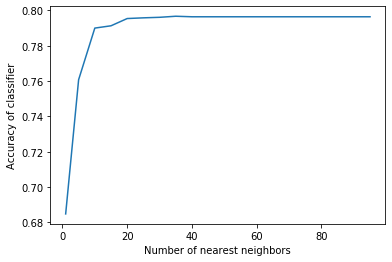

In [21]:
#Get the corresponding cross-validation accuracy scores
scores= [cv_accuracy_score(X, y, num_nbrs) for num_nbrs in nn]

#plot accuracy scores versus the number of nearest neighbors
plot(nn, scores)
xlabel('Number of nearest neighbors')
ylabel('Accuracy of classifier')

k~ 25-30 looks like it would be good 